# K-Means Clustering Comparison with CURE and Hierarcial Clustering algorithms

### Part a)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
X, y = make_moons(n_samples=10000, noise=0.05, random_state=42)

In [3]:
X

array([[ 0.37469348, -0.16680448],
       [-0.84234358,  0.11898889],
       [ 0.43910037,  0.8384732 ],
       ...,
       [-0.00407283,  0.25138056],
       [ 0.86363672,  0.51891346],
       [ 1.01028397, -0.43472843]])

In [4]:
y

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [5]:
data = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'label': y})
data.shape

(10000, 3)

In [6]:
data.head()

,feature1,feature2,label
0,0.374693,-0.166804,1
1,-0.842344,0.118989,0
2,0.439100,0.838473,0
3,-0.925517,0.149781,0
4,-0.945743,0.327583,0


### Part b)

In [7]:
random_samples = data.sample(n=500, random_state=42)

In [8]:
random_samples.shape

(500, 3)

In [9]:
random_samples.head()

,feature1,feature2,label
6252,0.807904,-0.532928,1
4684,1.514565,-0.314939,1
1731,-0.991646,0.243941,0
4742,-0.014138,0.517389,1
4521,0.344306,0.876755,0


### Part c)

In [10]:
X, y = data.iloc[:, :-1], data["label"]
X_samples, y_samples = random_samples.iloc[:, :-1], random_samples["label"]

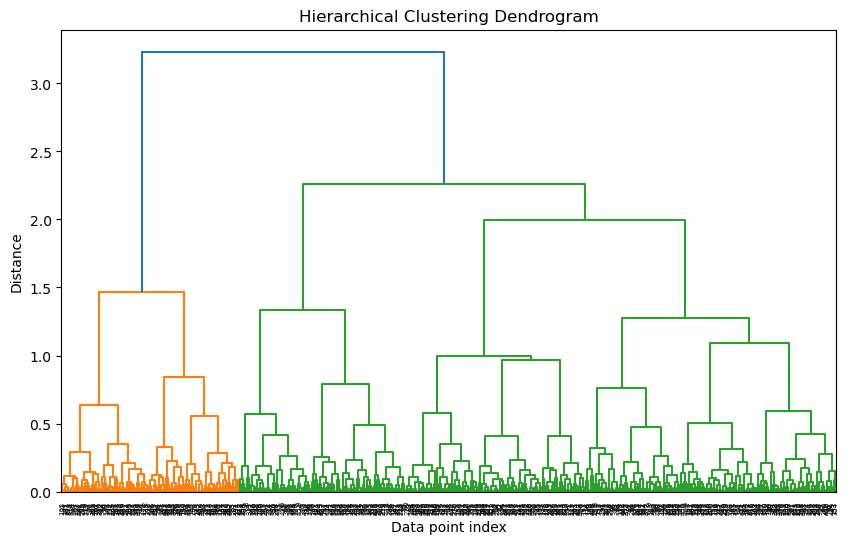

In [11]:
linkage_matrix = linkage(X_samples, method='complete')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point index')
plt.ylabel('Distance')
plt.show()

num_clusters = 2
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

### Part d)

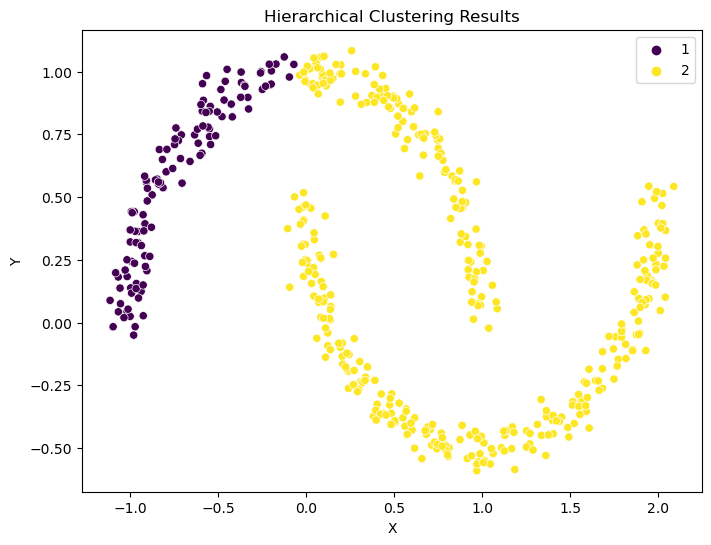

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_samples.iloc[:, 0], y=X_samples.iloc[:, 1], hue=clusters, palette='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Part e)

In [13]:
clusters

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [14]:
# Number of representation points in each cluster
m = 20

# Representation points array for all cluster
clusters_rep_points = []

for cluster_num in range(1, num_clusters + 1):
    clusters_rep_points.append(X_samples[clusters == cluster_num].sample(m))

In [15]:
len(clusters_rep_points)

2

### Part f)

In [16]:
cluster_centers = []

for cluster_rep_points in clusters_rep_points:
    cluster_center = np.mean(cluster_rep_points, axis=0)
    cluster_centers.append(cluster_center)   

cluster_centers

[feature1   -0.659339
 feature2    0.614165
 dtype: float64,
 feature1    0.665359
 feature2    0.000969
 dtype: float64]

In [17]:
# Shifted representation points for all clusters
shifted_clusters_rep_points = []

# Initializing the shifting amount
shifting_amount = 0.1

# Calculating the scaling factor using shifting_amount
scaling_factor = np.sqrt(1-shifting_amount)

for i in range(cluster_num):
    rep_points = clusters_rep_points[i]
    offset = (rep_points - cluster_centers[i])*scaling_factor
    rep_points = offset + cluster_centers[i] 
    shifted_clusters_rep_points.append(rep_points)

In [18]:
cluster_centers_df = pd.DataFrame(np.array([cluster_center.tolist() for cluster_center in cluster_centers]), columns=["feature1", "feature2"])

C:\Users\mehra\AppData\Local\Temp\ipykernel_27072\2430346540.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=shifted_clusters_rep_points[0].iloc[:, 0], y=shifted_clusters_rep_points[0].iloc[:, 1], palette='viridis')
C:\Users\mehra\AppData\Local\Temp\ipykernel_27072\2430346540.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=shifted_clusters_rep_points[1].iloc[:, 0], y=shifted_clusters_rep_points[1].iloc[:, 1], palette='viridis')
C:\Users\mehra\AppData\Local\Temp\ipykernel_27072\2430346540.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=clusters_rep_points[0].iloc[:, 0], y=clusters_rep_points[0].iloc[:, 1], palette='plasma')
C:\Users\mehra\AppData\Local\Temp\ipykernel_27072\2430346540.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=clusters_rep_points[1].iloc[:, 0], y=clu

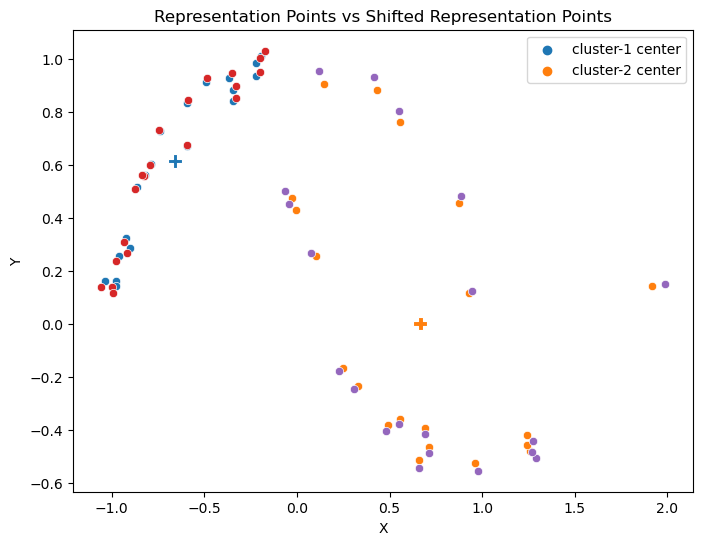

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=shifted_clusters_rep_points[0].iloc[:, 0], y=shifted_clusters_rep_points[0].iloc[:, 1], palette='viridis')
sns.scatterplot(x=shifted_clusters_rep_points[1].iloc[:, 0], y=shifted_clusters_rep_points[1].iloc[:, 1], palette='viridis')
sns.scatterplot(data=cluster_centers_df, x="feature1", y="feature2", hue=["cluster-1 center","cluster-2 center"], marker="P", s=100)
sns.scatterplot(x=clusters_rep_points[0].iloc[:, 0], y=clusters_rep_points[0].iloc[:, 1], palette='plasma')
sns.scatterplot(x=clusters_rep_points[1].iloc[:, 0], y=clusters_rep_points[1].iloc[:, 1], palette='plasma')
plt.title('Representation Points vs Shifted Representation Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Part g)

In [20]:
center_point_1 = np.array(cluster_centers[0].tolist())
center_point_2 = np.array(cluster_centers[1].tolist())

clusters = X.apply(lambda row: np.argmin([np.linalg.norm(row - center_point_1) , np.linalg.norm(row - center_point_2)]) + 1, axis=1)

In [21]:
clusters.value_counts()

2    6759
1    3241
Name: count, dtype: int64

### Part h)

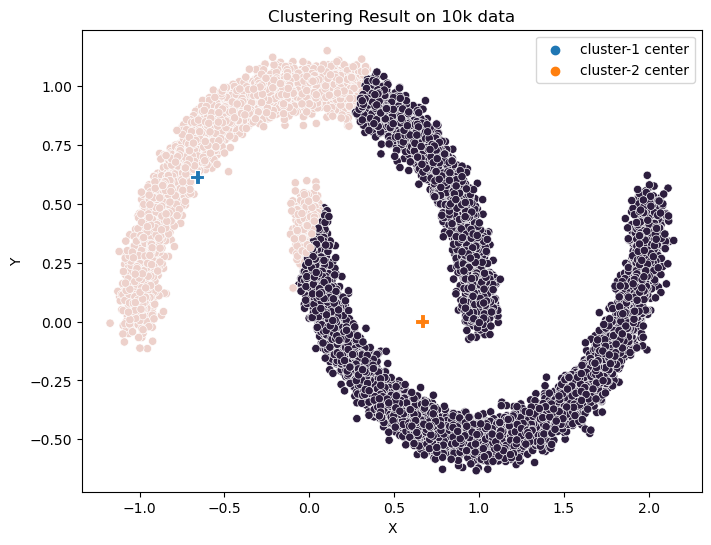

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X, x="feature1", y="feature2", hue=clusters, legend=False)
sns.scatterplot(data=cluster_centers_df, x="feature1", y="feature2", hue=["cluster-1 center","cluster-2 center"], marker="P", s=100)
plt.title('Clustering Result on 10k data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()